# USB Weight of evidence (woe) and Information Value (iv)
  - Calculate woe & IV
    - User defined module 
      - Features: Module to define Class to define bin for ctegorical and cntinuous features
      - AttributeRelevance: Module to calculate woe, iv, effective size and draw the result 
   - Adapted the idea and code from 'Telco Customer Churn Analysis' 
     - https://github.com/klaudia-nazarko/iv-and-woe-python/blob/master/telco_customer_churn_analysis.ipynb

In [1]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter
import matplotlib.pyplot as plt

from pandas.api.types import is_numeric_dtype

from Features import *
from AttributeRelevance import *

In [2]:
pd.options.display.float_format = '{:,.4f}'.format
pd.set_option('display.max_columns', None)  

In [3]:
path = 'C:\\Users\\sophia.yue\\Infosys\\Sandeep Project\\'
dfx = pd.read_excel(path + "INFOSYS_POPULATION_yue_20sep22.xlsx", sheet_name = 'INFOSYS_POPULATION_new', engine = 'openpyxl' )
dfx.head(3).T

,0,1,2
Revw_Month,2019/01,2019/01,2019/02
Yer,2019,2019,2019
Mth,1,1,2
Revw_Quarter,2019/1,2019/1,2019/1
Qty,1,1,1
Org_Struc_Desc,Corporation,Partnership,Non-Profit
NAICS_Cd,238160,621210,813319
NAICS_Desc,Roofing Contractors,Offices of Dentists,Other Social Advocacy Organizations
Revw_Id,117882,118031,119338
Scored_Flag,N,N,N


In [4]:
df= dfx.copy()

In [5]:
df['label'] = df['Decision'].map({'Declined': 0, 'Approved': 1})
df.drop(['Yer','Mth', 'Qty', 'NAICS_Cd', 'NAICS_Desc', 'Revw_Id', 'Decision'], axis=1, inplace=True)

In [6]:
feats_dict = {}

for col in [c for c in df.columns if c not in ['label',  'bin']]:
    if is_numeric_dtype(df[col]):
        feats_dict[col] = ContinuousFeature(df, col)
    else:
        feats_dict[col] = CategoricalFeature(df, col)

feats = list(feats_dict.values())

In [9]:
iv = IV()
ar = AttributeRelevance()

In [10]:
#ar.bulk_iv(feats, iv)
ar.bulk_iv(feats, iv, woe_extremes=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,iv,woe_min,woe_max
Revw_Month,0.0657,-0.5616,0.8493
Revw_Quarter,0.0327,-0.4296,0.2885
Org_Struc_Desc,0.3048,-0.4605,1.2821
Scored_Flag,0.3490,-0.3203,1.1217
Elan_Flag,0.0261,-0.1187,0.2199
CLI_or_New_Prod_Flag,0.0634,-0.1340,0.4759
Channel,0.0923,-0.7360,1.4925
Corporate_Card,0.0000,0.0000,0.0000
Purchasing_Card,0.0000,0.0000,0.0000
One_Card,0.0101,-1.0725,0.0094


In [12]:
s = StatsSignificance()

In [13]:
ar.bulk_stats(feats, s)

,p-value,effect_size
Revw_Month,0.8834,0.1109
Revw_Quarter,0.2527,0.0801
Org_Struc_Desc,0.0000,0.2183
Scored_Flag,0.0000,0.2298
Elan_Flag,0.0006,0.0685
CLI_or_New_Prod_Flag,0.0000,0.1039
Channel,0.0000,0.1233
Corporate_Card,1.0000,0.0000
Purchasing_Card,1.0000,0.0000
One_Card,0.0338,0.0426


In [ ]:
#ar.analyze(feats, iv, s)

In [14]:
ar.analyze(feats, iv, s, interpretation=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,iv,p-value,effect_size,iv_interpretation,es_interpretation
Final_Limit,2.0695,0.0000,0.5153,suspicious,strong
Financial_Template_Found_Flag,1.2886,0.0000,0.3919,suspicious,medium
Scored_Rec_Decision,1.0943,0.0000,0.3339,suspicious,medium
Scored_Flag,0.3490,0.0000,0.2298,strong,medium
Org_Struc_Desc,0.3048,0.0000,0.2183,strong,medium
Request_Amount,0.2003,0.0000,0.1930,medium,weak
SBFE_Score,0.0966,0.0000,0.1362,weak,weak
Channel,0.0923,0.0000,0.1233,weak,weak
Existing_Limit,0.0836,0.0000,0.1146,weak,weak
Revw_Month,0.0657,0.8834,0.1109,weak,weak


## Visualizations of Information Value

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


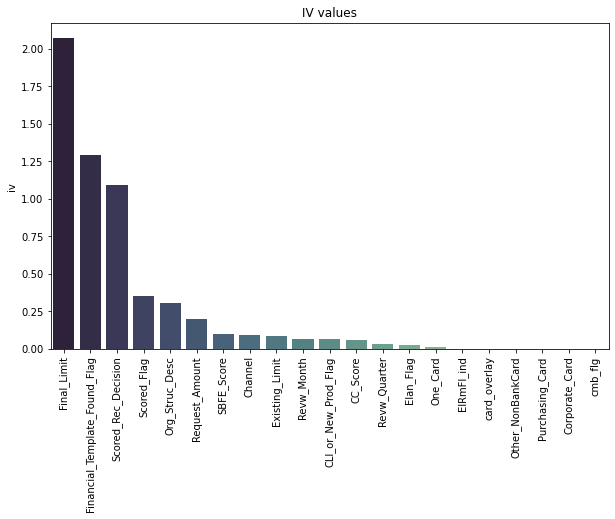

In [15]:
ar.draw_iv(feats, iv)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


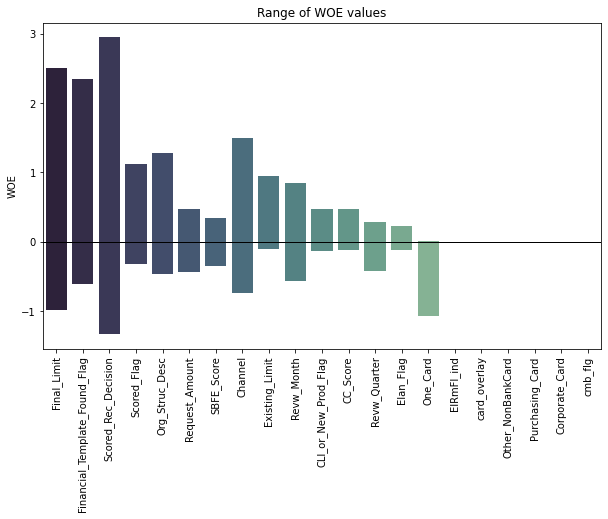

In [16]:
ar.draw_woe_extremes(feats, iv)

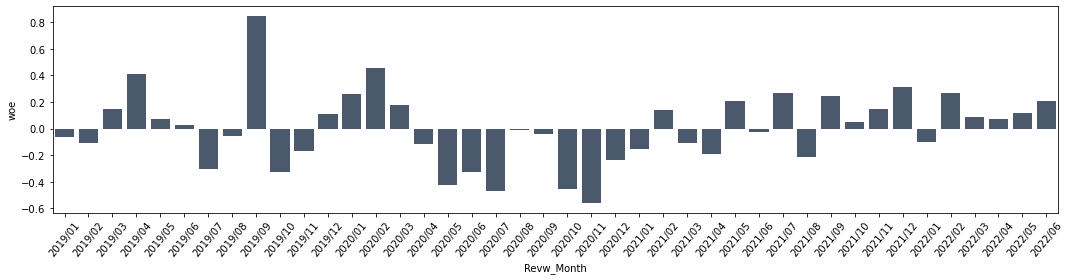

In [18]:
ar.draw_woe_singleplot(feats[:1], iv)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


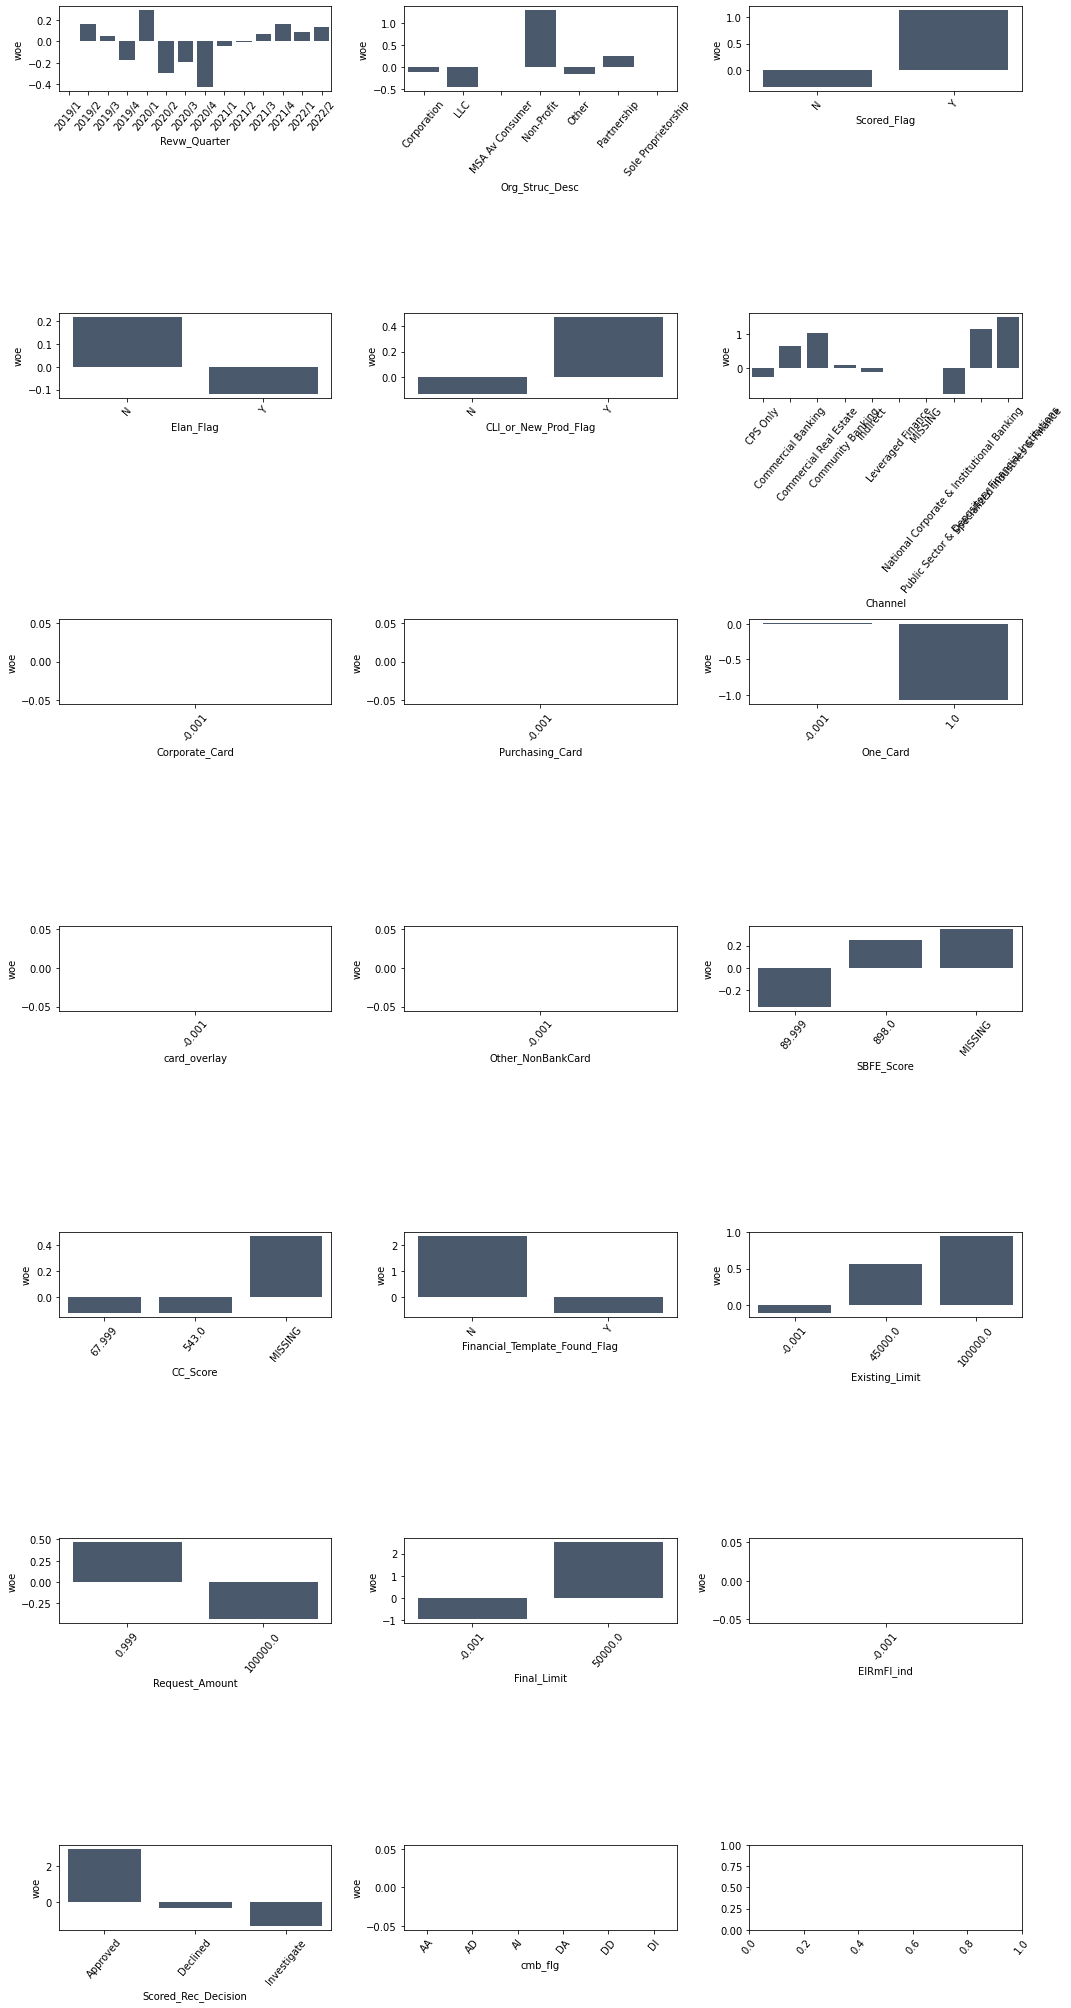

In [21]:
ar.draw_woe_multiplot(feats[1:], iv)